In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [2]:
#import data

data = pd.read_csv('C:\\Users\\sonja tilly.ABERDEEN\\GTA Data Scientist Interview Dataset.csv',\
                   low_memory=False)
data.head(2)

,Unnamed: 0,BOOKING_ID,CHECKIN_WINDOW,NO_OF_ROOMS,NO_OF_PASSENGERS,GROSS_SALES_EUR,COMMISSION_PERC,CLIENT_SEGMENT,SUPPLIER_CHAIN,STAR_RATING,ROOM_NIGHTS,CLIENT_MASTER_PARENT
0,1,1,16,1,1,284.8347,5.467639,Retail Agent (Offline),New World Hotels,5,2,1
1,2,2,5,1,2,970.9197,4.786115,Retail Agent (Offline),Independent,4,2,1


In [3]:
#deal with nan values

data = data.fillna(0)

In [4]:
table1 = data.groupby('CLIENT_SEGMENT').agg([np.sum])
table1

,Unnamed: 0,BOOKING_ID,CHECKIN_WINDOW,NO_OF_ROOMS,NO_OF_PASSENGERS,GROSS_SALES_EUR,COMMISSION_PERC,STAR_RATING,ROOM_NIGHTS,CLIENT_MASTER_PARENT
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
CLIENT_SEGMENT,,,,,,,,,,
Retail Agent (Offline),43140157,43075569,263836,8197,15929,3.270700e+06,14178.525684,31073,20846,858941
Retail Online (Ota),43301369,43262850,146518,5974,9787,1.114157e+06,2826.273297,19244,13353,808149


(array([0, 1]), <a list of 2 Text xticklabel objects>)

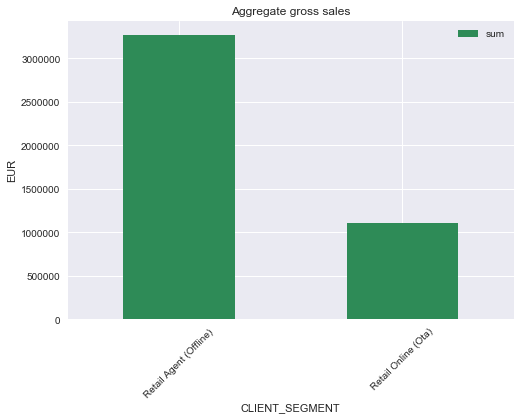

In [5]:
table1.GROSS_SALES_EUR.plot(kind='bar', color='seagreen')
plt.title('Aggregate gross sales')
plt.ylabel('EUR')
plt.xticks(rotation=45)

In [6]:
rao = data.loc[data['CLIENT_SEGMENT'] == 'Retail Agent (Offline)', 'GROSS_SALES_EUR']
ota = data.loc[data['CLIENT_SEGMENT'] == 'Retail Online (Ota)', 'GROSS_SALES_EUR']

RAO = pd.DataFrame(rao)
OTA = pd.DataFrame(ota)
OTA.tail()

,GROSS_SALES_EUR
13138,346.0
13139,466.5
13140,24.5
13141,184.0
13142,553.0


In [ ]:
fig = plt.figure(figsize=(18,6))
sns.set_style("whitegrid")

sub1 = plt.subplot(1,2, 1)
sub1 = sns.swarmplot(y=RAO['GROSS_SALES_EUR'], data=RAO)

sub2 = plt.subplot(1,2, 2)
sub1 = sns.swarmplot(y=OTA['GROSS_SALES_EUR'], data=OTA)

In [ ]:
RAO.boxplot(showmeans=True, whis = 100)
OTA.boxplot(showmeans=True, whis = 100)

In [37]:
from scipy.stats import ttest_ind

rao = data.loc[data['CLIENT_SEGMENT'] == 'Retail Agent (Offline)', 'GROSS_SALES_EUR']
ota = data.loc[data['CLIENT_SEGMENT'] == 'Retail Online (Ota)', 'GROSS_SALES_EUR']

ttest_ind(rao, ota)

Ttest_indResult(statistic=24.386678874755265, pvalue=1.6590306888291448e-128)

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
source: scipy

When you perform a t-test, you're usually trying to find evidence of a significant difference between population means (2-sample t) or between the population mean and a hypothesized value (1-sample t).
In statistics, the t-statistic is a ratio of the departure of an estimated parameter from its notional value to its standard error. It is used in hypothesis testing. For example, it is used in determining the population mean from a sampling distribution of sample means if the population standard deviation is unknown.

the p-value is very small, therefore we can reject the null hypothesis - the two series are significantly different.

In [70]:
df = data[['SUPPLIER_CHAIN', 'GROSS_SALES_EUR', 'CLIENT_MASTER_PARENT']]
#table2 = data.groupby('CLIENT_SEGMENT').agg([sum])
#table2.head()
#df = df.groupby('SUPPLIER_CHAIN').agg([sum])
#df.head()
df = df.sort_values(['CLIENT_MASTER_PARENT'], ascending=[False])
grouped = df.groupby('SUPPLIER_CHAIN').agg([sum])
grouped_sorted = grouped.sort_index(axis=1, level=1, ascending=False, inplace=True,\
                                    kind='quicksort', na_position='last', sort_remaining=True, by=None)
grouped_sorted

In [71]:
grouped_sorted